# ÍNDICE DE IMÁGENES SATELITALES

El análisis de la vegetación y la detección de los cambios en los patrones de vegetación son claves para la evaluación y el monitoreo de recursos naturales. Entonces no resulta sorpresivo que la detección y la evaluación cuantitativa de la vegetación verde es una de las aplicaciones principales de la teledetección para el manejo de recursos naturales y la toma de decisiones (EASTMAN, 2003).

## Índice de Vegetación de Diferencia Normalizada - NDVI

El Índice de Diferencia de Vegetación Normalizado, también conocido como NDVI (ROUSE et al., 1974) por sus siglas en inglés. Es un índice usado para medir la diferencia normalizada entre las reflectancias del rojo y del infrarrojo cercano, proporcionando una medida sobre la cantidad, calidad y desarrollo de la cobertura vegetal y vigorosidad en áreas extensas.

$NDVI$ = $\frac{NIR - RED}{NIR + RED}$

Donde:

NDVI	: Índice de vegetación de Diferencia Normalizada

NIR	: Reflectancia de la banda Infrarrojo cercano – NIR.

RED	: Reflectancia de la banda roja - RED


## Indices espectrales numpy

In [1]:
import os, glob

In [2]:
# Directorio de trabajo Landsat
os.chdir(r"E:\Python\Agricultura_Python\Datos\LC09_L2SP_006066_20220626")
os.getcwd()

'E:\\Python\\Agricultura_Python\\Datos\\LC09_L2SP_006066_20220626'

In [4]:
lista = glob.glob("*PY*.tif")
lista

['LC09_L2SP_006066_20220626_RS_B1234567_Clip_PY.tif']

In [5]:
import rasterio

### Seleccionar bandas espectrales

In [6]:
# Selecciona raster
L9_B1234567 = rasterio.open(lista[0])

In [7]:
# Convierte array Numpy N-D
Array_Red = L9_B1234567.read(4)
Array_Nir = L9_B1234567.read(5)
Array_Nir

array([[0.33306  , 0.31722  , 0.3271475, ..., 0.28884  , 0.27685  ,
        0.32041  ],
       [0.352365 , 0.3521725, 0.35264  , ..., 0.287575 , 0.27707  ,
        0.2894175],
       [0.3735125, 0.3436475, 0.3522275, ..., 0.30512  , 0.28851  ,
        0.285155 ],
       ...,
       [0.352475 , 0.2834775, 0.28103  , ..., 0.37035  , 0.3460125,
        0.32074  ],
       [0.3452425, 0.3471125, 0.3341875, ..., 0.3803325, 0.35055  ,
        0.384155 ],
       [0.367985 , 0.3634475, 0.3324825, ..., 0.3378175, 0.3613025,
        0.39125  ]])

### Determinar Indice NDVI

In [8]:
ndvi = (Array_Nir - Array_Red) / (Array_Nir + Array_Red)

In [9]:
ndvi.dtype

dtype('float64')

In [10]:
ndvi.min()

-0.536152647549274

In [11]:
ndvi.max()

0.9581827422633838

### Exportar ndvi

In [12]:
param = L9_B1234567.meta
param

{'driver': 'GTiff',
 'dtype': 'float64',
 'nodata': 0.0,
 'width': 479,
 'height': 465,
 'count': 7,
 'crs': CRS.from_wkt('PROJCS["WGS 84 / UTM zone 18S",GEOGCS["WGS 84",DATUM["World Geodetic System 1984",SPHEROID["WGS 84",6378137,298.257223563]],PRIMEM["Greenwich",0],UNIT["degree",0.0174532925199433,AUTHORITY["EPSG","9122"]]],PROJECTION["Transverse_Mercator"],PARAMETER["latitude_of_origin",0],PARAMETER["central_meridian",-75],PARAMETER["scale_factor",0.9996],PARAMETER["false_easting",500000],PARAMETER["false_northing",10000000],UNIT["metre",1,AUTHORITY["EPSG","9001"]],AXIS["Easting",EAST],AXIS["Northing",NORTH]]'),
 'transform': Affine(29.999999999999563, 0.0, 504614.9999999993,
        0.0, -29.999999999999563, 9063025.0)}

In [13]:
param = L9_B1234567.meta
param.update(count = 1,
             dtype= 'float64',
             nodata = None)
param

{'driver': 'GTiff',
 'dtype': 'float64',
 'nodata': None,
 'width': 479,
 'height': 465,
 'count': 1,
 'crs': CRS.from_wkt('PROJCS["WGS 84 / UTM zone 18S",GEOGCS["WGS 84",DATUM["World Geodetic System 1984",SPHEROID["WGS 84",6378137,298.257223563]],PRIMEM["Greenwich",0],UNIT["degree",0.0174532925199433,AUTHORITY["EPSG","9122"]]],PROJECTION["Transverse_Mercator"],PARAMETER["latitude_of_origin",0],PARAMETER["central_meridian",-75],PARAMETER["scale_factor",0.9996],PARAMETER["false_easting",500000],PARAMETER["false_northing",10000000],UNIT["metre",1,AUTHORITY["EPSG","9001"]],AXIS["Easting",EAST],AXIS["Northing",NORTH]]'),
 'transform': Affine(29.999999999999563, 0.0, 504614.9999999993,
        0.0, -29.999999999999563, 9063025.0)}

In [14]:
# Crear nombre de salida
name_ndvi = os.getcwd() +"\\"+ lista[0][0:25] + "_RS_B1234567_Clip_PY_ndvi.tif"
name_ndvi

'E:\\Python\\Agricultura_Python\\Datos\\LC09_L2SP_006066_20220626\\LC09_L2SP_006066_20220626_RS_B1234567_Clip_PY_ndvi.tif'

In [15]:
# Exportamos ndvi
with rasterio.open(name_ndvi, 'w', **param) as nd:
        nd.write_band(1, ndvi)

### Visualización del NDVI

In [16]:
import matplotlib.pyplot as plt

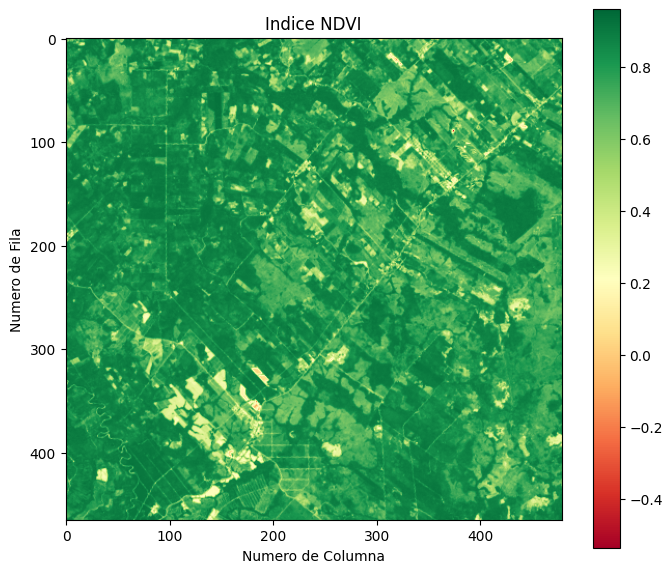

In [17]:
# Ploteamos el resultado
plt.figure(figsize = (8,7))
plt.imshow(ndvi, cmap='RdYlGn') # jet, Spectral, Viridis, RdYlGn
plt.colorbar()
plt.title("Indice NDVI")
plt.xlabel("Numero de Columna") # etiqueta X
plt.ylabel("Numero de Fila") # etiqueta Y
plt.show()

### Crear función NDVI

In [18]:
# Definimos la función solo las bandas
def fun_ndvi(nir, red):
    nir = nir.astype('float64')
    red = red.astype('float64')
    ndvi = (nir - red)/(nir + red)
    return ndvi

In [19]:
# Ejecutamos la función
ndvi2 = fun_ndvi(Array_Nir, Array_Red)

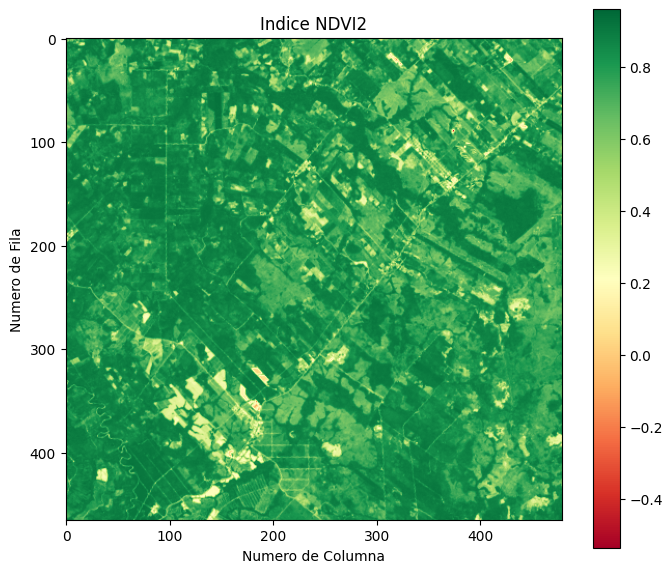

In [20]:
# Ploteamos el resultado
plt.figure(figsize = (8,7))
plt.imshow(ndvi2, cmap='RdYlGn') # jet, Spectral, Viridis, RdYlGn
plt.colorbar()
plt.title("Indice NDVI2")
plt.xlabel("Numero de Columna") # etiqueta X
plt.ylabel("Numero de Fila") # etiqueta Y
plt.show()

In [21]:
type(ndvi2)

numpy.ndarray

### Características del NDVI

In [22]:
print("Valor minimo NDVI:", ndvi2.min())
print("Valor maximo NDVI:", ndvi2.max())
print("Valor promedio NDVI:", ndvi2.mean())
print("Valor desviasion estandar NDVI:", ndvi2.std())
print("Valor varianza NDVI:", ndvi2.var())
print("Dimensiones NDVI:", ndvi2.shape)
print("Tipo dato NDVI:", ndvi2.dtype)
print("Total de pixcel NDVI:", ndvi2.size)

Valor minimo NDVI: -0.536152647549274
Valor maximo NDVI: 0.9581827422633838
Valor promedio NDVI: 0.7856284144570561
Valor desviasion estandar NDVI: 0.11728420840688343
Valor varianza NDVI: 0.013755585541629266
Dimensiones NDVI: (465, 479)
Tipo dato NDVI: float64
Total de pixcel NDVI: 222735


### Clasificación NDVI

In [23]:
import numpy as np

In [24]:
Clasifi = [-np.Inf, 0.1, 0.4, 0.6, 0.7, 0.8, 0.9, np.Inf]
Clasifi

[-inf, 0.1, 0.4, 0.6, 0.7, 0.8, 0.9, inf]

In [25]:
ndvi_Class = np.digitize(ndvi2, Clasifi)
ndvi_Class

array([[5, 4, 4, ..., 5, 4, 6],
       [4, 4, 4, ..., 4, 4, 6],
       [5, 4, 3, ..., 3, 3, 5],
       ...,
       [5, 5, 5, ..., 6, 7, 6],
       [6, 6, 6, ..., 6, 6, 6],
       [6, 6, 6, ..., 6, 6, 6]], dtype=int64)

In [26]:
ndvi_Class.min()

1

In [27]:
ndvi_Class.max()

7

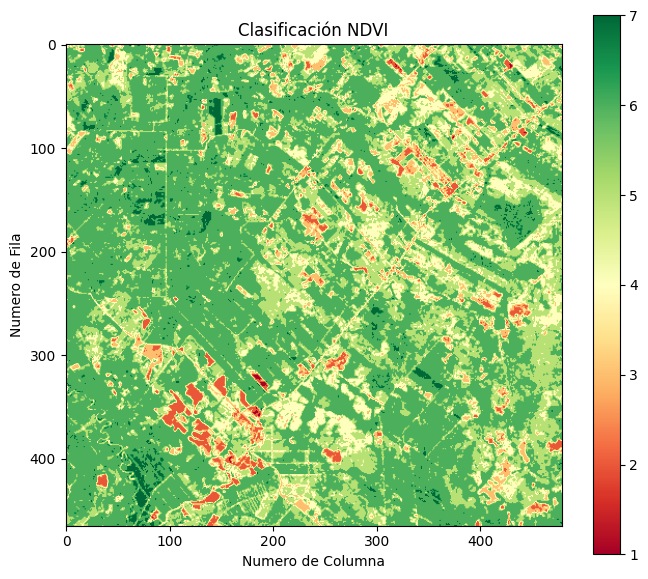

In [28]:
# Ploteamos el resultado
plt.figure(figsize = (8,7))
plt.imshow(ndvi_Class, cmap='RdYlGn') # jet, Spectral, Viridis, RdYlGn
plt.colorbar()
plt.title("Clasificación NDVI")
plt.xlabel("Numero de Columna") # etiqueta X
plt.ylabel("Numero de Fila") # etiqueta Y
plt.show()

In [29]:
ndvi_Class

array([[5, 4, 4, ..., 5, 4, 6],
       [4, 4, 4, ..., 4, 4, 6],
       [5, 4, 3, ..., 3, 3, 5],
       ...,
       [5, 5, 5, ..., 6, 7, 6],
       [6, 6, 6, ..., 6, 6, 6],
       [6, 6, 6, ..., 6, 6, 6]], dtype=int64)

In [30]:
# Guardar tipo de dato int - entero
ndvi_Class = ndvi_Class.astype(int)
ndvi_Class

array([[5, 4, 4, ..., 5, 4, 6],
       [4, 4, 4, ..., 4, 4, 6],
       [5, 4, 3, ..., 3, 3, 5],
       ...,
       [5, 5, 5, ..., 6, 7, 6],
       [6, 6, 6, ..., 6, 6, 6],
       [6, 6, 6, ..., 6, 6, 6]])

In [31]:
ndvi_Class.dtype

dtype('int32')

In [32]:
param_clas = L9_B1234567.meta
param_clas.update(count = 1,
                  nodata = None,
                  dtype= 'int32')
param_clas

{'driver': 'GTiff',
 'dtype': 'int32',
 'nodata': None,
 'width': 479,
 'height': 465,
 'count': 1,
 'crs': CRS.from_wkt('PROJCS["WGS 84 / UTM zone 18S",GEOGCS["WGS 84",DATUM["World Geodetic System 1984",SPHEROID["WGS 84",6378137,298.257223563]],PRIMEM["Greenwich",0],UNIT["degree",0.0174532925199433,AUTHORITY["EPSG","9122"]]],PROJECTION["Transverse_Mercator"],PARAMETER["latitude_of_origin",0],PARAMETER["central_meridian",-75],PARAMETER["scale_factor",0.9996],PARAMETER["false_easting",500000],PARAMETER["false_northing",10000000],UNIT["metre",1,AUTHORITY["EPSG","9001"]],AXIS["Easting",EAST],AXIS["Northing",NORTH]]'),
 'transform': Affine(29.999999999999563, 0.0, 504614.9999999993,
        0.0, -29.999999999999563, 9063025.0)}

In [33]:
# Crear nombre de salida
name_ndvi_clas = os.getcwd() +"\\"+ lista[0][0:25] + "_RS_B1234567_Clip_PY_ndvi_class.tif"
name_ndvi_clas

'E:\\Python\\Agricultura_Python\\Datos\\LC09_L2SP_006066_20220626\\LC09_L2SP_006066_20220626_RS_B1234567_Clip_PY_ndvi_class.tif'

In [34]:
# Exportamos una banda MDE Clasificado
with rasterio.open(name_ndvi_clas, 'w', **param_clas) as DATOS:
    DATOS.write_band(1, ndvi_Class)

### Enmascaramiento selección de cobertura

In [48]:
import copy

In [49]:
ndvi_copi = copy.copy(ndvi2)

In [50]:
ndvi_copi[ndvi_copi > 0.8] = 1
ndvi_copi[ndvi_copi <= 0.8] = np.nan
ndvi_copi

array([[nan, nan, nan, ..., nan, nan,  1.],
       [nan, nan, nan, ..., nan, nan,  1.],
       [nan, nan, nan, ..., nan, nan, nan],
       ...,
       [nan, nan, nan, ...,  1.,  1.,  1.],
       [ 1.,  1.,  1., ...,  1.,  1.,  1.],
       [ 1.,  1.,  1., ...,  1.,  1.,  1.]])

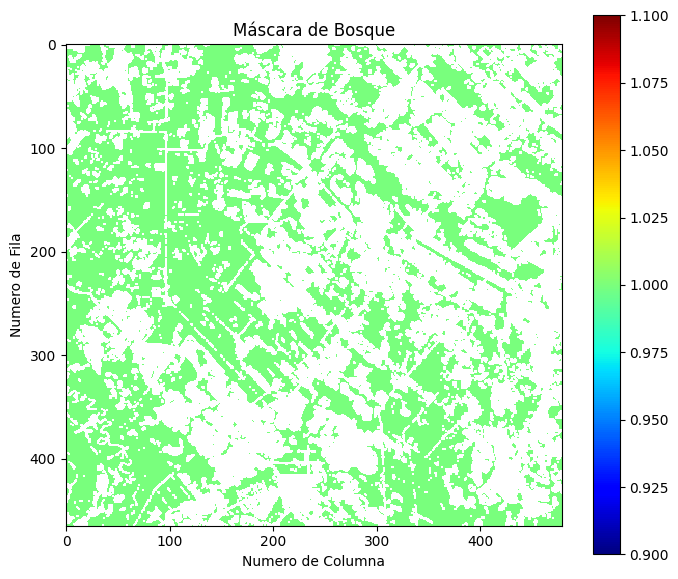

In [51]:
# Ploteamos el resultado
plt.figure(figsize = (8,7))
plt.imshow(ndvi_copi, cmap='jet') # jet, Spectral, Viridis, RdYlGn
plt.colorbar()
plt.title('Máscara de Bosque')
plt.xlabel("Numero de Columna") # etiqueta X
plt.ylabel("Numero de Fila") # etiqueta Y
plt.show()

In [52]:
ndvi_copi.dtype

dtype('float64')

In [53]:
paramVegetacion = L9_B1234567.meta
paramVegetacion.update(count = 1,
                       nodata = None,
                       dtype= 'float64')
paramVegetacion

{'driver': 'GTiff',
 'dtype': 'float64',
 'nodata': None,
 'width': 479,
 'height': 465,
 'count': 1,
 'crs': CRS.from_wkt('PROJCS["WGS 84 / UTM zone 18S",GEOGCS["WGS 84",DATUM["World Geodetic System 1984",SPHEROID["WGS 84",6378137,298.257223563]],PRIMEM["Greenwich",0],UNIT["degree",0.0174532925199433,AUTHORITY["EPSG","9122"]]],PROJECTION["Transverse_Mercator"],PARAMETER["latitude_of_origin",0],PARAMETER["central_meridian",-75],PARAMETER["scale_factor",0.9996],PARAMETER["false_easting",500000],PARAMETER["false_northing",10000000],UNIT["metre",1,AUTHORITY["EPSG","9001"]],AXIS["Easting",EAST],AXIS["Northing",NORTH]]'),
 'transform': Affine(29.999999999999563, 0.0, 504614.9999999993,
        0.0, -29.999999999999563, 9063025.0)}

In [54]:
# Crear nombre de salida
name_ndvi_veg = os.getcwd() +"\\"+ lista[0][0:25] + "_RS_B1234567_Clip_PY_ndvi_clas_veg1.tif"
name_ndvi_veg

'E:\\Python\\Agricultura_Python\\Datos\\LC09_L2SP_006066_20220626\\LC09_L2SP_006066_20220626_RS_B1234567_Clip_PY_ndvi_clas_veg1.tif'

In [55]:
# Exportamos una banda Clasificado
with rasterio.open(name_ndvi_veg, 'w', **paramVegetacion) as DATOS:
    DATOS.write_band(1, ndvi_copi)

In [56]:
mascara_ndvi = ndvi_copi*ndvi

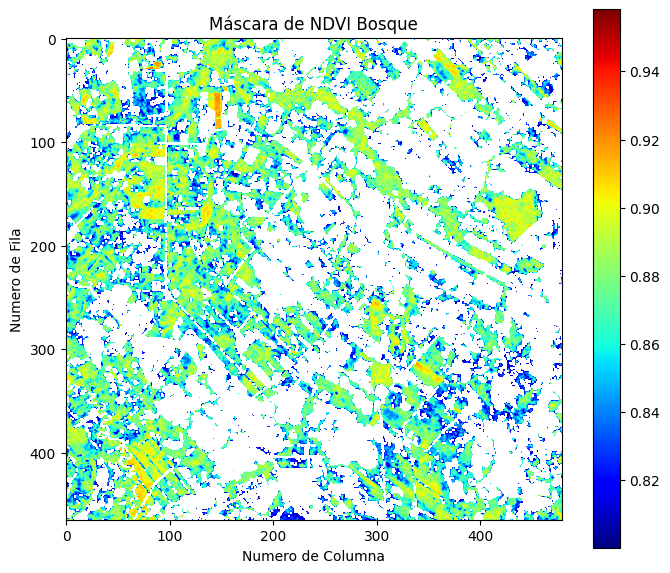

In [59]:
# Ploteamos el resultado
plt.figure(figsize = (8,7))
plt.imshow(mascara_ndvi, cmap='jet') # jet, Spectral, Viridis, RdYlGn
plt.colorbar()
plt.title('Máscara de NDVI Bosque')
plt.xlabel("Numero de Columna") # etiqueta X
plt.ylabel("Numero de Fila") # etiqueta Y
plt.show()

## Calcular el NDVI de la Bosque

In [58]:
print("Valor minimo NDVI:", np.nanmin(mascara_ndvi))
print("Valor maximo NDVI:", np.nanmax(mascara_ndvi))
print("Valor promedio NDVI:", np.nanmean(mascara_ndvi))
print("Valor desviasion estandar NDVI:", np.nanstd(mascara_ndvi))
print("Valor varianza NDVI:", np.nanvar(mascara_ndvi))
print("Dimensiones NDVI:", mascara_ndvi.shape)
print("Tipo dato NDVI:", mascara_ndvi.dtype)
print("Total de pixcel NDVI:", mascara_ndvi.size)

Valor minimo NDVI: 0.8000093916800152
Valor maximo NDVI: 0.9581827422633838
Valor promedio NDVI: 0.8603832347321867
Valor desviasion estandar NDVI: 0.02753620389319011
Valor varianza NDVI: 0.0007582425248473381
Dimensiones NDVI: (465, 479)
Tipo dato NDVI: float64
Total de pixcel NDVI: 222735
